In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

In [5]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
# x_train, t_train = x_train[:5000], t_train[:5000]
# x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num' : 30, 'filter_size' : 5, 'pad' : 0, 'stride' : 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)

trainer.train()

train loss:2.2974828192433403
=== epoch:1, train acc:0.137, test acc:0.134 ===
train loss:2.2942429928169337
train loss:2.289239316385983
train loss:2.280918946032311
train loss:2.268831265815824
train loss:2.2506784394276576
train loss:2.2241376847620913
train loss:2.217465758709808
train loss:2.1942133780758386
train loss:2.136401496509766
train loss:2.0898683892290633
train loss:2.0536364390620796
train loss:1.9981718822930108
train loss:1.9557509745388324
train loss:1.846829637941145
train loss:1.7599437687362356
train loss:1.7349414489060897
train loss:1.6190182441169774
train loss:1.6389078171633824
train loss:1.475383163133187
train loss:1.341602903326331
train loss:1.2398916152952657
train loss:1.2252719752097796
train loss:1.179564395928206
train loss:1.079098323059275
train loss:1.0908295158006798
train loss:0.9727185585752466
train loss:1.0286540799567954
train loss:0.8635283809368528
train loss:0.8430068913172561
train loss:0.9649608807440232
train loss:0.869863490349643
tr

In [6]:
# 매개변수 보존
network.save_params('params.pkl')
print("Saved Network Parameters!")

Saved Network Parameters!


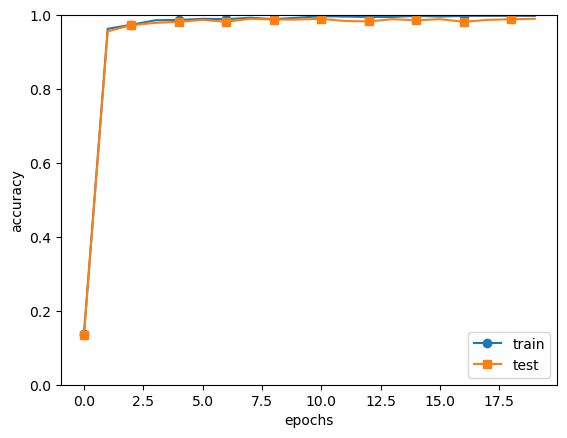

In [7]:
# 그래프 그리기
markers = {'train' : 'o', 'test' : 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()